In [ ]:
import pandas as pd
from collections import defaultdict
from datasets import load_dataset
from tqdm import tqdm
tqdm.pandas()

ds = load_dataset("allenai/WildChat-1M")
messages = ds['train']
df = messages.to_pandas() 

In [8]:
df["first_message"] = df["conversation"].progress_apply(lambda x: x[0]["content"])
df["messages"] = df["conversation"].progress_apply(lambda x: [m["content"] for m in x if m["role"] == "user"])
all_messages = df["messages"].explode().reset_index(drop=True)

100%|██████████| 837989/837989 [00:20<00:00, 39972.06it/s]


In [ ]:
data = {}
# First messages
n = len(df)
nunique = df["first_message"].nunique()
assert df["first_message"].nunique() == len(df["first_message"].unique())

data["first_messages"] = {
    "reuse": nunique,
    "duplicates": n - nunique,
    "reuse_percentage": (nunique) / n * 100,
    "duplicates_percentage": (n - nunique) / n * 100,
}

# All messages
n = len(all_messages)
nunique = all_messages.nunique()
assert all_messages.nunique() == len(all_messages.unique())
data["all_messages"] = {
    "reuse": nunique,
    "duplicates": n - nunique,
    "reuse_percentage": (nunique) / n * 100,
    "duplicates_percentage": (n - nunique) / n * 100,
}


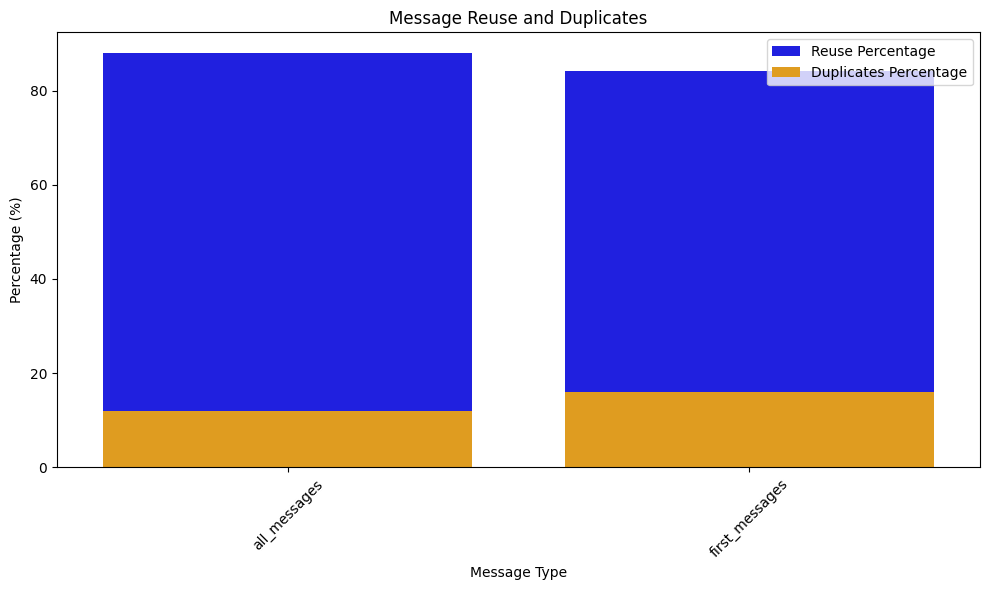

In [24]:
# Plot data 
import matplotlib.pyplot as plt
import seaborn as sns
def plot_data(data):
    df = pd.DataFrame(data).T
    df = df.sort_values(by="reuse_percentage", ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.index, y="reuse_percentage", data=df, color='blue', label='Reuse Percentage')
    sns.barplot(x=df.index, y="duplicates_percentage", data=df, color='orange', label='Duplicates Percentage')
    
    plt.title("Message Reuse and Duplicates")
    plt.xlabel("Message Type")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_data(data)

In [11]:
data

{'first_messages': {'reuse': 704398,
  'duplicates': 133591,
  'reuse_percentage': 84.05814396131692,
  'duplicates_percentage': 15.941856038683087},
 'all_messages': {'reuse': 1724010,
  'duplicates': 236064,
  'reuse_percentage': 87.9563730757104,
  'duplicates_percentage': 12.043626924289594}}